Q3.Write a function to create the negative of an image.

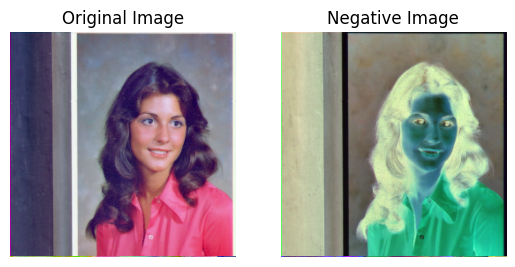

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def Negative(image_path):
    img = plt.imread(image_path)
    max_value = np.max(img)
    negative_img = max_value - img
    negative_img = (negative_img / max_value) * 255
    negative_img = negative_img.astype('uint8')
    return negative_img

path = r'C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\4.1.04.tiff'
Img = plt.imread(path)
Inv_Img= Negative(path)

plt.subplot(1,2,1)
plt.imshow(Img,cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(Inv_Img,cmap='gray')
plt.axis('off')
plt.title("Negative Image")
plt.show()


# Q1 K-Nearest Neighbour

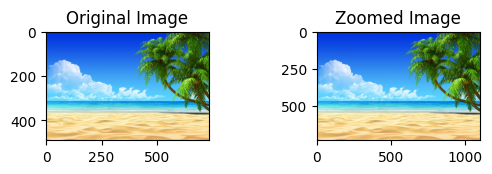

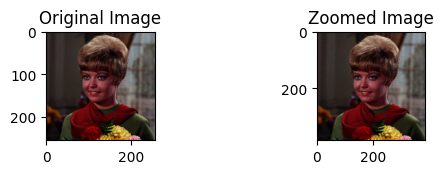

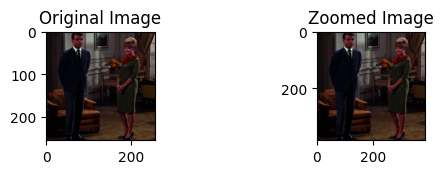

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def zoom_nearest(image, scale):
    height, width = image.shape[:2]
    new_height, new_width = int(height * scale), int(width * scale)
    new_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    scale_factor = 1 / scale
    for i in range(new_height):
        for j in range(new_width):
            x = int(j * scale_factor)
            y = int(i * scale_factor)
            new_image[i, j] = image[y, x]
    return new_image

image = plt.imread(r"C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\bg1.jpg")
zoomed_image = zoom_nearest(image, 1.5)
plt.subplot(3, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(3, 2, 2)
plt.imshow(zoomed_image)
plt.title('Zoomed Image')
plt.show()

image = plt.imread(r"C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\4.1.01.tiff")
zoomed_image = zoom_nearest(image, 1.5)
plt.subplot(3, 2, 3)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(3, 2, 4)
plt.imshow(zoomed_image)
plt.title('Zoomed Image')
plt.show()

image = plt.imread(r"C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\4.1.02.tiff")
zoomed_image = zoom_nearest(image, 1.5)
plt.subplot(3, 2, 5)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(3, 2, 6)
plt.imshow(zoomed_image)
plt.title('Zoomed Image')
plt.show()

# Q1 Bilinear Interpolation

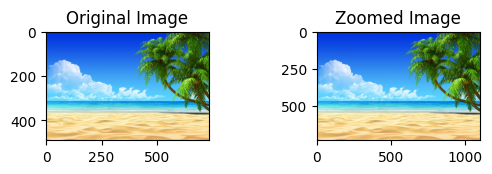

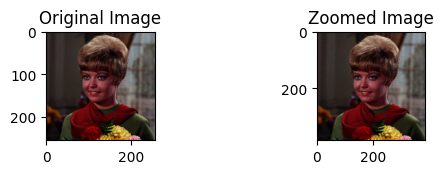

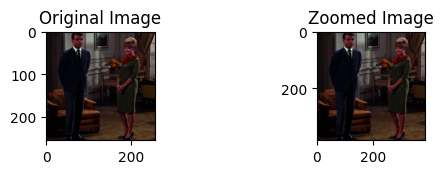

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def zoom_bilinear(img, scale):
    h, w = img.shape[:2]
    new_h, new_w = int(h * scale), int(w * scale)
    new_img = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    scale_factor = 1 / scale

    for i in range(new_h):
        for j in range(new_w):
            x = j * scale_factor
            y = i * scale_factor
            x1 = int(x)
            x2 = min(x1 + 1, w - 1)
            y1 = int(y)
            y2 = min(y1 + 1, h - 1)
            w1 = (x2 - x)*(y2 - y)
            w2 = (x - x1)*(y2 - y)
            w3 = (x2 - x)*(y - y1)
            w4 = (x - x1)*(y - y1)
            new_img[i, j] = (w1 * img[y1, x1] + w2 * img[y1, x2] + w3 * img[y2, x1] + w4 * img[y2, x2]).astype(np.uint8)

    return new_img

image = plt.imread(r"C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\bg1.jpg")
zoomed_image = zoom_nearest(image, 1.5)
plt.subplot(3, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(3, 2, 2)
plt.imshow(zoomed_image)
plt.title('Zoomed Image')
plt.show()
image = plt.imread(r"C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\4.1.01.tiff")
zoomed_image = zoom_nearest(image, 1.5)
plt.subplot(3, 2, 3)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(3, 2, 4)
plt.imshow(zoomed_image)
plt.title('Zoomed Image')
plt.show()
image = plt.imread(r"C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\4.1.02.tiff")
zoomed_image = zoom_nearest(image, 1.5)
plt.subplot(3, 2, 5)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(3, 2, 6)
plt.imshow(zoomed_image)
plt.title('Zoomed Image')
plt.show()


Nearest neighbor assigns the Nearest colour value in Original image to the Zoomed image pixel.This results in pixelated image.Hence this is computationally faster method.

On the other hand Bilinear transformation assigns the average of 4 nearest pixels in Original image to the new Zoomed image.THe quality is much more as compared to Nearest neighbor technique as the zoomed image is much smoother. Hence this method takes much more computional time than Nearest neighbor.

# Q 2

The histogram is multimodal.


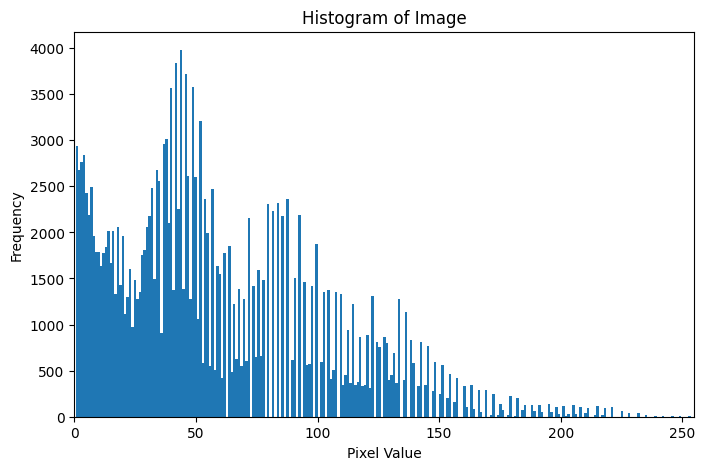

In [4]:
import scipy
from scipy.signal import find_peaks
def plot_histogram(image):
    histogram, bin_edges = np.histogram(image.ravel(), bins=256, range=(0, 255))
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(bin_edges[:-1], histogram, width=1)
    ax.set_xlim(min(bin_edges), max(bin_edges))
    ax.set_xlabel('Pixel Value')
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of Image')
    
    peaks, _ = find_peaks(histogram, distance=20)
    if len(peaks) == 1:
        print('The histogram is unimodal.')
    elif len(peaks) == 2:
        print('The histogram is bimodal.')
    elif len(peaks) > 2:
        print('The histogram is multimodal.')
    else:
        print('The histogram has no identifiable modes.')

image = plt.imread(r"C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\4.1.01.tiff")
plot_histogram(image)



# Q2 .2
 If we make MSB of bitplane to 0 then the dynamic range will be reduced which results in lower contrast of new image than the original image.

# Q2 .3
 If we keep the LSB of the bitplane to 0, we will be quantizing the pixel value.This leads to loss of details in the image.

# Q2.4

Given baud rate = 56Kbps
Hence in 1 sec 56K bits are transmitted.

Total no of bits in given image = 512 * 512 * 8    (We need 8 bits to represent 255 intensity levels)
                                = 2097152 bits

Also each byte will have a start & stop bit, ie 2 * 512*512 = 524288
Therfore total bits being transmitted are 2097152 + 524288 = 2621440
Therefore time taken to transmit such no of bits using 56Kbps Baud link will be = 2621440/56000 =  46.8 sec
Similarly ,time taken to transmit such no of bits using 3000Kbps Baud link will be =2097152/3000000 = 0.87 sec 